In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x1, x2):
    return x1**2 / 20.0 + x2**2

def df(x1, x2):
    return x1 / 10.0, 2.0*x2

In [28]:
class AdaGrad:
    def __init__(self, eta=1.5):
        self.eta = eta
        self.h = None
        
    def update(self, params, grads): 
        if self. h is None: # 생성과 동시에 0으로 초기화 해준다
            self.h = {}
            for key, w in params.items():                                
                self.h[key] = np.zeros_like(w)
                
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.eta * 1/(self.h[key]**(1/2)) * grads[key] 

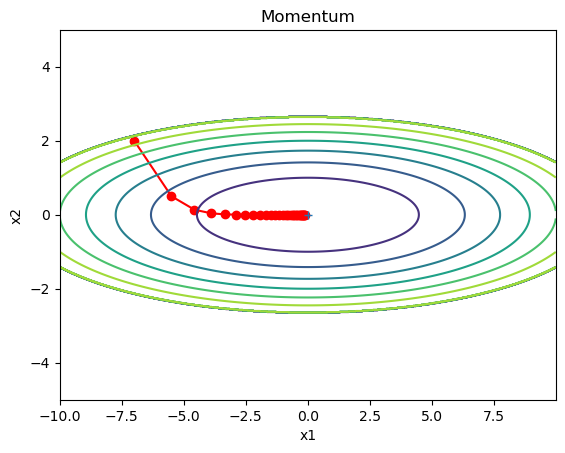

In [34]:
x1_history = []
x2_history = []
params = {}
grads = {}
params['x1'], params['x2'] = -7.0, 2.0

optimizer = AdaGrad() # optimizer를 Momentum으로 바꾼 것
    
for i in range(30):
    x1_history.append(params['x1'])
    x2_history.append(params['x2'])
        
    grads['x1'], grads['x2'] = df(params['x1'], params['x2'])
    optimizer.update(params, grads)    

scope1 = np.arange(-10, 10, 0.01)
scope2 = np.arange(-5, 5, 0.01)    
X, Y = np.meshgrid(scope1, scope2) 
Z = f(X, Y)
    
# 외곽선 단순화
mask = Z > 7
Z[mask] = 0
    
plt.plot(x1_history, x2_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.plot(0, 0, '+')
plt.title('Momentum')
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()